# Face recognition with ORL

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from utils import load_dataset, image_width, image_height, rotate_image, num_classes
from scipy import misc, ndimage

plt.gray()

<Figure size 432x288 with 0 Axes>

## 2 - Upload dataset ##

In [2]:
# Loading the ORL faces dataset
train_X_origin, train_Y, test_X_origin, test_Y = load_dataset(False)

print ("train_X shape: " + str(train_X_origin.shape))
print ("train_Y shape: " + str(train_Y.shape))
print ("test_X shape: " + str(test_X_origin.shape))
print ("test_Y shape: " + str(test_Y.shape))

train_X shape: (320, 92, 112, 1)
train_Y shape: (320, 1)
test_X shape: (80, 92, 112, 1)
test_Y shape: (80, 1)


In [3]:
# Let's standardize our dataset.
train_X_scaled = np.copy(train_X_origin)/255.
test_X_scaled = np.copy(test_X_origin)/255.

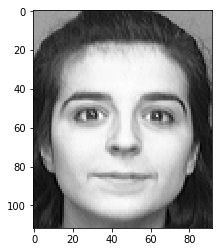

In [4]:
# Example of a picture
index = 11
plt.imshow(np.copy(train_X_scaled)[index].reshape(image_height, image_width))
plt.show()

In [5]:
# GRADED FUNCTION: image2vector
def image2vector(image):
    """
    Argument:
    image -- a numpy array of shape (length, height, depth)
    
    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """
    
    v = np.copy(image).reshape(image.shape[0], -1)

    return v

In [6]:
# Reshape the training and test examples so that images of size (92, 112, 1) are flattened into single vectors
train_X = image2vector(train_X_scaled) 
test_X = image2vector(test_X_scaled) 
print ("flattened train_X: " + str(train_X.shape))
print ("flattened test_X: " + str(test_X.shape))

flattened train_X: (320, 10304)
flattened test_X: (80, 10304)


## 3 -  Classification algorithm ##

In [7]:
#Euclidean distance between 2-dimensional point
def find_euclidean_distance(A, B):
    return np.sqrt(np.sum((A - B)**2))

In [8]:
distance = find_euclidean_distance(train_X[0:1], test_X[0:1])
print("Euclidean distance between first rows: ", distance)

Euclidean distance between first rows:  19.765694


In [9]:
def classify(train_data, train_labels, testData, numberOfClasses = num_classes, k = 1):
    #Euclidean distance between 2-dimensional point
    test_labels = []
    for testPoint in testData:
        #Claculate distances between test point and all of the train points
        testDist = [ [find_euclidean_distance(testPoint, train_data[i]), train_labels[i][0]] for i in range(train_data.shape[0])]
        #How many points of each class among nearest K
        stat = [0 for i in range(numberOfClasses)]
        
        for d in sorted(testDist)[0:k]:
            stat[d[1]] += 1.0
        #Assign a class with the most number of occurences among K nearest neighbours
        test_labels.append( sorted(zip(stat, range(numberOfClasses)), reverse=True)[0][1] )
    return np.array(test_labels).reshape(80,1)
#     return test_labels.reshape(80,1)

In [10]:
predicted_Y = classify(train_X, train_Y, test_X)

In [11]:
print(predicted_Y.flatten())
print(test_Y.flatten())

[ 0  9  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10 11 11
 12 12 13 13 14 14 15 15 16 16 17 17 18 18 19 19 20 20 21 21 22 22 23 23
 24 24 25 25 26 26 27 27 28 28 29 29 30 30 31 31 32 32 33 33 35 34 35 35
 36 36 37 37 38 38 39 39]
[ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10 11 11
 12 12 13 13 14 14 15 15 16 16 17 17 18 18 19 19 20 20 21 21 22 22 23 23
 24 24 25 25 26 26 27 27 28 28 29 29 30 30 31 31 32 32 33 33 34 34 35 35
 36 36 37 37 38 38 39 39]


In [12]:
def calc_accuracy(X, Y):
    """
    Calculate the model accuracy. Predicted labels vs true ones.
    
    Argument:
    X -- a numpy array (labels) of shape (length, height). Usually, it's a matrix of predicted labels.
    Y -- a numpy array (labels) of shape (length, height). Usually, it's a matrix of real labels.
    
    Returns:
    accuracy -- a classification accuracy
    """
    accuracy = (np.copy(X) == np.copy(Y)).mean()
    return accuracy

In [13]:
print ("Accuracy: ", calc_accuracy(predicted_Y, test_Y))

Accuracy:  0.975


## 4 - Image normalization ## 

In [14]:
def normalize(X,axis=0):
    """
    Normalize dataset by features or samples. 
    
    Argument:
    X -- a numpy array (dataset) of shape (length, height, depth)
    axis -- an axis along which the normalization is computed. 0 - normalization by features, 
            1 - normalization by samples. Default value is 0
    
    Returns:
    N -- a normalized dataset
    
    - If we have whole dataset we can for each feature in the dataset 
    calculate mean value and subtract it from the feature. 
    - In case of continuously growing dataset like online learning 
    we normalize each observation (face image in our case) separately: 
    calculate mean from data entry (one face image), subtract mean from original image 
    and divide it by standard deviation of the image.

    """
    X = np.copy(X)
    N = (X-X.mean(axis=axis, keepdims=True))/X.std(axis=axis, keepdims=True)
    return N

In [15]:
print('Normalization by samples')
train_X_normalized_by_samples=normalize(train_X, axis=1)
test_X_normalized_by_samples=normalize(test_X, axis=1)
print('Normalization by features')
train_X_normalized_by_features=normalize(train_X, axis=0)
test_X_normalized_by_features=normalize(test_X, axis=0)

Normalization by samples
Normalization by features


In [16]:
predicted_Y_normalized_by_samples = classify(train_X_normalized_by_samples, 
                                             train_Y, 
                                             test_X_normalized_by_samples)

predicted_Y_normalized_by_features = classify(train_X_normalized_by_features, 
                                              train_Y, 
                                              test_X_normalized_by_features)

In [17]:
print ("Accuracy for dataset normalized by samples: ", calc_accuracy(predicted_Y_normalized_by_samples, test_Y))
print ("Accuracy for dataset normalized by features: ", calc_accuracy(predicted_Y_normalized_by_features, test_Y))

Accuracy for dataset normalized by samples:  0.975
Accuracy for dataset normalized by features:  0.9875


**Result table**: 

<style type="text/css">td {text-align:left}</style>
<table style="width:auto">
    <tr>
        <td>  ** Normalization **  </td>
        <td> ** by features ** </td>
        <td> ** by samples ** </td>
        <td> ** no normalization ** </td>
    </tr>
    <tr>
        <td>  ** Accuracy **  </td>
        <td> 98.75% </td>
        <td> 97.5%</td>
        <td> 97.5% </td>
    </tr>
</table>

## 5 - PCA ##

In [18]:
def cov(M):
    '''
    Calculate the covariance matrix
    '''
    X = np.copy(M)
    return np.dot(X.T, X)

# def cov2(M):
#     '''
#     Calculate the covariance matrix
#     note: this mean-centers and auto-scales the data (in-place)
#     '''
#     X = np.copy(M)
#     N = X.shape[0]  
#     return np.dot(X.T, X.conj())/float(N-1)

# def cov3(M):
#     '''
#     Calculate the covariance matrix
#     '''
#     X = np.copy(M)
#     return np.cov(X)

c1 = cov(train_X)
print("!!!!!!!!!!1 conv mtrx 1 ", c1)

!!!!!!!!!!1 conv mtrx 1  [[42.527634 42.463276 42.624695 ... 32.304634 31.881153 31.81855 ]
 [42.463276 42.472275 42.597733 ... 32.288994 31.863224 31.806507]
 [42.624695 42.597733 42.80271  ... 32.526566 32.123367 32.021996]
 ...
 [32.304634 32.288994 32.526566 ... 41.448875 39.07662  38.014046]
 [31.881153 31.863224 32.123367 ... 39.07662  38.484024 37.517574]
 [31.81855  31.806507 32.021996 ... 38.014046 37.517574 37.72298 ]]


In [19]:
def pca(M, pc_count = None):
    """
    Principal component analysis using eigenvalues
    note: this mean-centers and auto-scales the data (in-place)
    """
    X = np.copy(M)
    # centralize our data by removing the mean from each value within our dataset
    X -= X.mean(axis=0)
    X /= np.std(X, 0)
    C = cov(X)
#     C = cov3(X.T)
    # calculate the eigendecomposition (eigenvalues and eigenvectors of a real symmetric matrix)
    E, V = np.linalg.eigh(C)

    key = None
    if (pc_count<1):
        n=X.shape[1]
        p=1
        i=0
        while p>pc_count:
            i+=1
            key=np.argsort(-E)[:n-i]
            p=np.sum(E [key])/np.sum(E)
        # calculate the projection of the original matrix
        transform_pca=V[:, key]
    else:
        key = np.argsort(E)[::-1][:int(pc_count)]
        # calculate the projection of the original matrix
        transform_pca = V[:, key]
        
#     print("!!!!!!!!!!1 transform_pca ", transform_pca.shape)

    # calculate the projection of the original matrix
#     P = np.dot(V.T, data.T).T
    return transform_pca

transform_pca = pca(train_X, 0.90)

# print("!!!!!!!!!!1 pca_X ", transform_pca.shape)

In [20]:
print("!!!!!!!!!!1 pca_X ", transform_pca.shape)

!!!!!!!!!!1 pca_X  (10304, 101)


In [21]:
train_X_pca = np.dot(train_X, transform_pca)
print("!!!!!!!!!!1 train_X_pca ", train_X_pca.shape)
test_X_pca = np.dot(test_X, transform_pca)
print("!!!!!!!!!!1 test_X_pca ", test_X_pca.shape)

!!!!!!!!!!1 train_X_pca  (320, 101)
!!!!!!!!!!1 test_X_pca  (80, 101)


In [22]:
predicted_Y_pca = classify(train_X_pca, train_Y, test_X_pca)
print ("Accuracy for dataset normalized by PCA: ", calc_accuracy(predicted_Y_pca, test_Y))

Accuracy for dataset normalized by PCA:  0.975


## 6 - Image alignment ##

Original Image:  (112, 92)


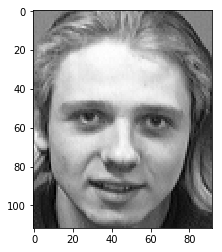

Rotated Image:  (112, 92)


/home/eugene/anaconda3/lib/python3.7/site-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


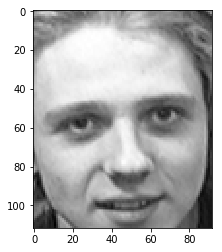

Done


In [23]:
image = train_X_origin[30].reshape(image_height, image_width)
angle = 10

image_orig = np.copy(image)
image_height, image_width = image_orig.shape[0:2]

print("Original Image: ", image.shape)
plt.imshow(image)
plt.show()
image_rotated = rotate_image(image, angle)
print("Rotated Image: ", image_rotated.shape)
plt.imshow(image_rotated)
plt.show()

print("Done")